In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# Load the dataset to get an overview of its structure
file_path = './comments (1).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and content
df.head()

,post_title,post_content,post_comment,subreddit,sentiment,post_date,post_link,comment_date,comment_link,post_time
0,How do I get over sexual jealousy,I know how pathetic it sounds but I really don...,1. Don't normalize what other people do or wha...,mentalhealth,negative,2024-03-04,https://www.reddit.com/r/mentalhealth/comments...,2024-03-04 23:44:26,https://www.reddit.com/r/mentalhealth/comments...,23:10:43
1,How do I get over sexual jealousy,I know how pathetic it sounds but I really don...,Never compare yourself to anybody else. Your l...,mentalhealth,negative,2024-03-04,https://www.reddit.com/r/mentalhealth/comments...,2024-03-05 00:28:51,https://www.reddit.com/r/mentalhealth/comments...,23:10:43
2,How do I get over sexual jealousy,I know how pathetic it sounds but I really don...,I can relate but I do like to remind myself th...,mentalhealth,negative,2024-03-04,https://www.reddit.com/r/mentalhealth/comments...,2024-03-04 23:46:40,https://www.reddit.com/r/mentalhealth/comments...,23:10:43
3,How do I get over sexual jealousy,I know how pathetic it sounds but I really don...,I'm almost certain most people lie about the a...,mentalhealth,positive,2024-03-04,https://www.reddit.com/r/mentalhealth/comments...,2024-03-05 00:02:33,https://www.reddit.com/r/mentalhealth/comments...,23:10:43
4,How do I get over sexual jealousy,I know how pathetic it sounds but I really don...,Find yourself a nice woman and try to have a r...,mentalhealth,negative,2024-03-04,https://www.reddit.com/r/mentalhealth/comments...,2024-03-05 00:05:27,https://www.reddit.com/r/mentalhealth/comments...,23:10:43


In [ ]:
# Text Preprocessing and Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['post_comment'])
tfidf_normalized = normalize(tfidf_matrix)  # Normalize features to improve clustering

# Clustering
num_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_normalized)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'scipy.sparse._csr.csr_matrix'>


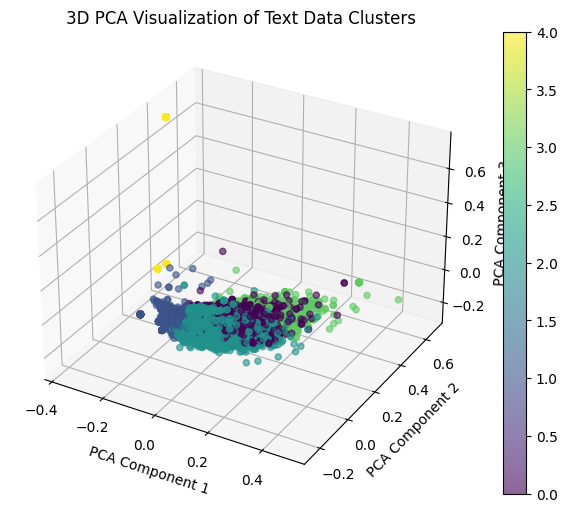

In [ ]:
print(type(tfidf_normalized))
tfidf_dense = tfidf_normalized.toarray()
# Apply PCA for dimensionality reduction
# Apply PCA for 3D dimensionality reduction
pca_3d = PCA(n_components=3)
pca_3d_results = pca_3d.fit_transform(tfidf_dense)

# 3D Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_results[:, 0], pca_3d_results[:, 1], pca_3d_results[:, 2],
                     c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
ax.set_title('3D PCA Visualization of Text Data Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

In [ ]:
# Attach clusters back to the original data
df['Cluster'] = clusters

# Displaying the first few rows of each cluster to analyze and interpret

cluster_samples = {}
for i in range(num_clusters):
    cluster_samples[i] = df[df['Cluster'] == i]['post_comment'].head(10).tolist()

cluster_samples

{0: ['Never compare yourself to anybody else. Your life is your life and your story is your story. Live it the way you want to.',
  'I\'m almost certain most people lie about the amount of time they have had sex because it seems cool to be this pipe laying manly man "Idk the equivalent for women, I\'m a guy so I\'m  talking from my experience". Don\'t focus so much on what others say and don\'t beat yourself up. You\'re 20 years old you have so much time ahead of you its almost unimaginable. Focus more on finding someone you can see yourself spend the rest of your life with. I\'m 25 and I\'ve only had sex with one person and that\'s my current girlfriend who I met in high school and I don\'t want anyone else.  Think of it like this if you\'re fishing don\'t try to catch the little minnows go after the marlin that\'s the real prize.',
  'Find yourself a nice woman and try to have a relationship. Hook ups are overrated. Put yourself out there and try to overcome your low self esteem. Try